## Introduction


In this notebook, we use Car Evaluation Dataset that consists of the features, namely -- buying(Cost of the Car), maintenance (Maintenance Cost), doors (No. of Doors), persons (No. of Persons), lug_boot (Luggage Boot) and Safety.

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making.

It's an imbalanced dataset with categorical variables. We shall explore the dataset in the following section!

## Load Packages and the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import pickle

In [2]:
columns = ["buying","maintenance","doors","persons","lug_boot","safety","class"]
dataset_original = pd.read_csv(r'D:\Car_Evaluation\Car_Evaluation_Data.data',sep=',',names=columns)

In [3]:
# Copy the dataset, so we can explore it while the original data is safe
dataset = dataset_original.copy()

In [4]:
# Let's have a glimpse of our data
dataset.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Let's get some info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# Let's get some statistical info about the data
dataset.describe()

,buying,maintenance,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Conclusion from the data, so far

* No null values

* The dataset is imbalanced, and hence, metric to consider will be F1 score

* We have all the categorical variables - 4 Object, 2 int  

* We need to perform Label Encoding,but no One-hot encoding since the labels have superior-inferior relationship with each other



In [7]:
# Let's have a look at our labels/classes
dataset['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [8]:
# Let's get our labels
labels = dataset['class'] 

In [9]:
# Let's drop the labels from the dataset, so that we automatically have
# our independent features ready
dataset.drop(columns='class',axis=1,inplace=True)

In [10]:
# Making the Stratified Train Test Split
X_train, X_test, y_train, y_test = train_test_split(dataset, labels,
                                                    stratify=labels, 
                                                    test_size=0.25)

## Processing the Train Dataset

In [11]:
# Let's create two nested dictionaries to assist us in the process of Label 
# Encoding our features and labels
replace_values_features = {
    "buying" : {"vhigh": 3, "high":2, "med":1, "low":0},
    "maintenance" : {"vhigh": 3, "high":2, "med":1, "low":0},
    "doors" : {"2":0, "3":1, "4":2, "5more":3},
    "persons" : {"2":0, "4":1, "more":2},
    "lug_boot" : {"small":0, "med":1, "big":2},
    "safety" : {"low":0, "med":1, "high":2}
}

replace_values_labels = {"unacc":0, "acc":1, "good":2, "vgood":3}

In [12]:
# Label encoding the Independent Features
X_train.replace(to_replace=replace_values_features,inplace=True)

d:\Car_Evaluation\cars\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
d:\Car_Evaluation\cars\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 784 to 187
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buying       1296 non-null   int64
 1   maintenance  1296 non-null   int64
 2   doors        1296 non-null   int64
 3   persons      1296 non-null   int64
 4   lug_boot     1296 non-null   int64
 5   safety       1296 non-null   int64
dtypes: int64(6)
memory usage: 70.9 KB


In [14]:
y_train.replace(to_replace=replace_values_labels, inplace=True)

## Processing the Test Set

In [15]:
# Label encoding the Independent Features
X_test.replace(to_replace=replace_values_features,inplace=True)

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 1144 to 975
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buying       432 non-null    int64
 1   maintenance  432 non-null    int64
 2   doors        432 non-null    int64
 3   persons      432 non-null    int64
 4   lug_boot     432 non-null    int64
 5   safety       432 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [17]:
y_test.replace(to_replace=replace_values_labels, inplace=True)

## SVC Model

In [18]:
# We chose the Linear Kernel
model = SVC(kernel='linear') 

In [19]:
#Train the model 
model.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

## Evaluating the Results

In [21]:
print("The F1 score of the model is:",f1_score(y_test,y_pred,average='weighted'))

The F1 score of the model is: 0.8262653050970308


We get satisfactory score of 84.4 % on the test dataset. However, to improve the performance, using a Random Forest Classifier or Artificial Neural Network can be considered.

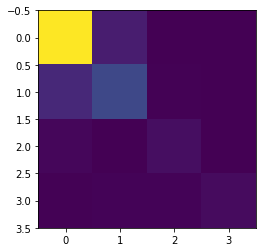

In [22]:
# Get the Confusion Matrix
plt.imshow(confusion_matrix(y_test,y_pred))

## Save the model

In [23]:
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [27]:
ab = model.predict([[0,1,1,1,0,1]])

In [29]:
ab[0]

0